In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read in csv
matches = pd.read_csv('data/model_samps.csv')
matches.head()

,Unnamed: 0,match_id,game_duration,game_mode,map,match_type,stats.DBNOs,stats.assists,stats.boosts,stats.damageDealt,...,stats.rideDistance,stats.roadKills,stats.swimDistance,stats.teamKills,stats.timeSurvived,stats.vehicleDestroys,stats.walkDistance,stats.weaponsAcquired,stats.winPlace,stats.rank
0,0,b62ce27e-d6c8-47d7-bc0b-d7c16858074f,1631,squad,DihorOtok_Main,official,1.0,0.0,0.0,59.28042,...,0.0,0.0,0.0,0.0,446.0,0.0,327.442260,0.0,26.0,NaN
1,0,b62ce27e-d6c8-47d7-bc0b-d7c16858074f,1631,squad,DihorOtok_Main,official,1.0,0.0,0.0,100.00001,...,0.0,0.0,0.0,0.0,513.0,0.0,162.948850,0.0,10.0,NaN
2,0,b62ce27e-d6c8-47d7-bc0b-d7c16858074f,1631,squad,DihorOtok_Main,official,3.0,4.0,3.0,428.55988,...,0.0,0.0,0.0,0.0,1531.0,0.0,4119.098600,9.0,1.0,NaN
3,0,b62ce27e-d6c8-47d7-bc0b-d7c16858074f,1631,squad,DihorOtok_Main,official,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
4,0,b62ce27e-d6c8-47d7-bc0b-d7c16858074f,1631,squad,DihorOtok_Main,official,1.0,0.0,0.0,100.00001,...,0.0,0.0,0.0,0.0,438.0,0.0,45.003754,0.0,19.0,NaN


In [3]:
matches.dropna(subset = ["stats.kills"], inplace=True)

In [4]:
matches.dropna(subset = ["stats.heals"], inplace=True)

In [5]:
X = matches[["stats.heals"]]
y = matches["stats.kills"].values.reshape(-1, 1)

In [6]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [8]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [9]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

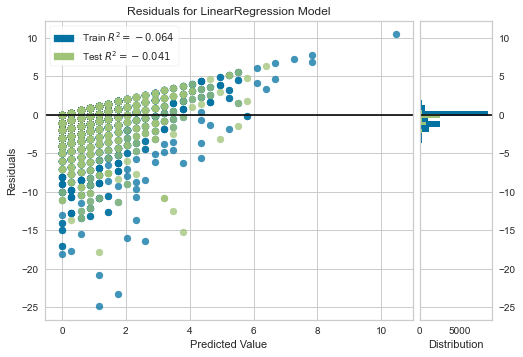

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [10]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

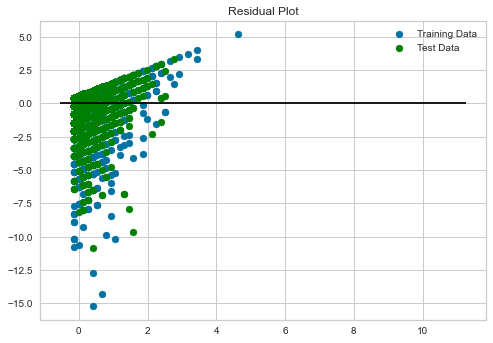

In [11]:
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="green", label="Test Data")
plt.legend()
plt.hlines(y=0, xmin = y_test_scaled.min(), xmax = y_test_scaled.max(), color="black")
plt.title("Residual Plot")

plt.show()

In [12]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
# YOUR CODE HERE
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8394476501428699, R2: 0.10382184366463743


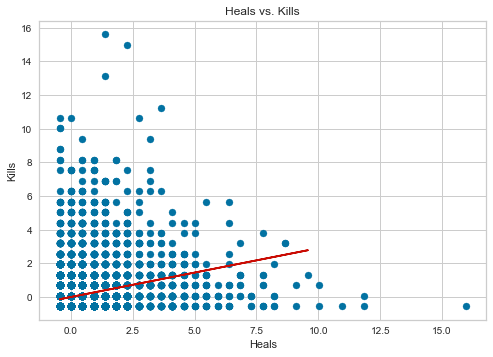

In [17]:
#Plot real values vs. predicted
plt.scatter(X_train_scaled, y_train_scaled)
plt.plot(X_test_scaled, predictions, color='r')
plt.xlabel("Heals")
plt.ylabel("Kills")
plt.title("Heals vs. Kills")
plt.show()